<a href="https://colab.research.google.com/github/pandemic-tracking/viz-gen/blob/main/louisville_wws.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas

In [2]:
import geopandas as gpd

In [3]:
import pandas as pd
import numpy as np

from datetime import datetime, timedelta
import pytz

import altair as alt
from altair import datum
alt.data_transformers.disable_max_rows()

from pathlib import Path

pd.set_option("display.precision", 4)

now_est = datetime.now().astimezone(pytz.timezone("US/Eastern"))

now_est_time = now_est.strftime("%Y-%m-%d, %H:%M:%S ET")
now_est_date = now_est.strftime("%Y-%m-%d")
now_est_timestamp = now_est.strftime("%Y%m%d_%H%M%S")
now_utc_timestamp = datetime.utcnow().strftime("%Y%m%d_%H%M%S")
print(now_est_time, now_est_date, now_est_timestamp, now_utc_timestamp)

2022-02-01, 16:27:40 ET 2022-02-01 20220201_162740 20220201_212740


In [4]:
# adapting from https://towardsdatascience.com/consistently-beautiful-visualizations-with-altair-themes-c7f9f889602

def ptc_theme():
    axisColor = "#808080"
    gridColor = "#DEDDDD"
    markColor = "#000000"
    font = 'Arial'
    labelFont = 'Arial'
    # Colors
    # main_palette = ["#1696d2", 
    #                 "#d2d2d2",
    #                 "#000000", 
    #                 "#fdbf11", 
    #                 "#ec008b", 
    #                 "#55b748", 
    #                 "#5c5859", 
    #                 "#db2b27", 
    #                ]
    # sequential_palette = ["#cfe8f3", 
    #                       "#a2d4ec", 
    #                       "#73bfe2", 
    #                       "#46abdb", 
    #                       "#1696d2", 
    #                       "#12719e", 
    #                      ]
    return {
          "config": {
              "title": {
                  "fontSize": 20,
                  "font": font,
                  "anchor": "start", # equivalent of left-aligned.
                  "fontColor": "#000000",
                  "fontWeight": "normal",
              },
              "text": {
                  "font": font,
                  "labelFont": labelFont,
              },
              "header": {
                  "font": font,
                  "labelFont": labelFont,
                  "titleFont": font,
              },
              "axisX": {
                  "domain": False,
                  "domainColor": axisColor,
                  "labelColor": axisColor,
                  "domainWidth": 1,
                  "grid": False,
                  "labelFont": labelFont,
                  "labelFontSize": 12,
                  "labelAngle": 0, 
                  "tickColor": axisColor,
                  "tickSize": 5, # default, including it just to show you can change it
                  "titleFont": font,
                  "titleFontSize": 12,
                  "titlePadding": 10, # guessing, not specified in styleguide
                  "title": "X Axis Title (units)", 
              },
              "axisY": {
                  "domain": False,
                  "grid": True,
                  "gridColor": gridColor,
                  "gridWidth": 1,
                  "labelFont": labelFont,
                  "labelColor": axisColor,
                  "labelFontSize": 12,
                  "labelAngle": 0,
                  "labelAnchor": "end",
                  "labelAlign": "right",  
                  "ticks": False, # even if you don't have a "domain" you need to turn these off.
                  "titleFont": font,
                  "titleFontSize": 12,
                  "titlePadding": 10, # guessing, not specified in styleguide
                  "title": "Y Axis Title (units)", 
                  # titles are by default vertical left of axis so we need to hack this 
                  "titleAngle": 0, # horizontal
                  "titleY": -10, # move it up
                  "titleX": 18, # move it to the right so it aligns with the labels 
              },
            #   "range": {
            #       "category": main_palette,
            #       "diverging": sequential_palette,
            #   },
              "legend": {
                  "labelFont": labelFont,
                  "labelFontSize": 12,
                  "symbolType": "circle", # just 'cause
                  "symbolSize": 100, # default
                  "titleFont": font,
                  "titleFontSize": 12,
                  "title": "", # set it to no-title by default
                  "orient": "right", # so it's right next to the y-axis
                  "offset": 0, # literally right next to the y-axis.
              },
              "view": {
                  "stroke": "transparent", # altair uses gridlines to box the area where the data is visualized. This takes that off.
              },
        }
    }

alt.themes.register("my_custom_theme", ptc_theme)
alt.themes.enable("my_custom_theme")

ThemeRegistry.enable('my_custom_theme')

# Load case data for zipcode and Jefferson County

In [5]:
# downloaded shapefile zip from https://data.lojic.org/datasets/LOJIC::weekly-covid-19-average-daily-incidence-rate-per-zip-code-in-jefferson-county-ky/about
zip_gdf = gpd.read_file('/content/Weekly_COVID-19_Average_daily_incidence_rate_per_zip_code_in_Jefferson_County%2C_KY.zip', parse_dates=['COLLECTION'])

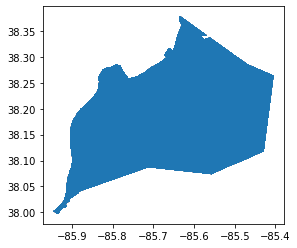

In [6]:
zip_gdf.plot()

In [7]:
zip_gdf[zip_gdf.ZIPCODE.isna()]

OBJECTID ZIPCODE COLLECTION  ...  SHAPE_Leng  SHAPE_Area  geometry
2548    144252    None       None  ...         0.0         0.0      None
3277    144981    None       None  ...         0.0         0.0      None

[2 rows x 14 columns]

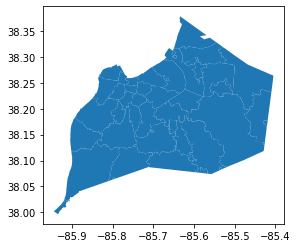

In [8]:
zip_shapes = zip_gdf[zip_gdf['COLLECTION']=='2022-01-16']
zip_shapes.plot()

In [9]:
zip_gdf

OBJECTID  ...                                           geometry
0       141704  ...  MULTIPOLYGON (((-85.57758 38.08021, -85.57666 ...
1       141705  ...  MULTIPOLYGON (((-85.57758 38.08021, -85.57666 ...
2       141706  ...  MULTIPOLYGON (((-85.57758 38.08021, -85.57666 ...
3       141707  ...  MULTIPOLYGON (((-85.57758 38.08021, -85.57666 ...
4       141708  ...  MULTIPOLYGON (((-85.57758 38.08021, -85.57666 ...
...        ...  ...                                                ...
3910    145614  ...  POLYGON ((-85.66947 38.25770, -85.66551 38.259...
3911    145615  ...  POLYGON ((-85.66947 38.25770, -85.66551 38.259...
3912    145616  ...  POLYGON ((-85.66947 38.25770, -85.66551 38.259...
3913    145617  ...  POLYGON ((-85.66947 38.25770, -85.66551 38.259...
3914    145618  ...  POLYGON ((-85.66947 38.25770, -85.66551 38.259...

[3915 rows x 14 columns]

In [10]:
zip_gdf['date_ending'] = pd.to_datetime(zip_gdf['COLLECTION'])+timedelta(days=6)

In [11]:
# downloaded from https://data.lojic.org/datasets/covid-19-daily-case-count-in-jefferson-county-ky/explore
county_df = pd.read_csv('/content/COVID-19_Daily_Case_Count_in_Jefferson_County%2C_KY.csv', parse_dates=['reported'])

In [12]:
county_df = county_df.sort_values('reported')

In [13]:
county_df['confirmed_per100k_7davg'] = county_df['Confirmed_RatePer100K'].rolling(7, min_periods=5).mean()

In [14]:
county_df[['reported','Confirmed_RatePer100K','confirmed_per100k_7davg']].tail(50)

reported  Confirmed_RatePer100K  confirmed_per100k_7davg
506 2021-12-07 05:00:00+00:00                44.4347                  42.6104
507 2021-12-08 05:00:00+00:00                51.9925                  42.8896
553 2021-12-09 05:00:00+00:00                41.1770                  42.4987
554 2021-12-10 05:00:00+00:00                40.0042                  40.6744
555 2021-12-11 05:00:00+00:00                47.9529                  40.2090
556 2021-12-12 05:00:00+00:00                33.4889                  40.6185
557 2021-12-13 05:00:00+00:00                28.9281                  41.1398
558 2021-12-14 05:00:00+00:00                40.2648                  40.5441
559 2021-12-15 05:00:00+00:00                52.9046                  40.6744
560 2021-12-16 05:00:00+00:00                38.3102                  40.2648
561 2021-12-17 05:00:00+00:00                68.0202                  44.2671
562 2021-12-18 05:00:00+00:00                39.8739                  43.1130
563 2021-12-19 05:00:00+00:00                    NaN                  44.7170
564 2021-12-20 05:00:00+00:00                86.7844                  54.3597
565 2021-12-21 05:00:00+00:00                44.0437                  54.9895
566 2021-12-22 05:00:00+00:00                70.7567                  57.9648
567 2021-12-23 05:00:00+00:00                66.5868                  62.6776
568 2021-12-24 05:00:00+00:00                64.1110                  62.0261
569 2021-12-25 05:00:00+00:00                42.4801                  62.4605
570 2021-12-26 05:00:00+00:00                49.7772                  60.6486
571 2021-12-27 05:00:00+00:00                45.8680                  54.8034
572 2021-12-28 05:00:00+00:00               214.4852                  79.1521
573 2021-12-29 05:00:00+00:00               226.3431                 101.3788
574 2021-12-30 05:00:00+00:00               225.8219                 124.1266
575 2021-12-31 05:00:00+00:00               305.9606                 158.6766
576 2022-01-01 05:00:00+00:00               194.6785                 180.4192
577 2022-01-02 05:00:00+00:00               111.0215                 189.1684
578 2022-01-03 05:00:00+00:00               194.4179                 210.3898
579 2022-01-04 05:00:00+00:00               243.2830                 214.5038
580 2022-01-05 05:00:00+00:00               361.9926                 233.8823
581 2022-01-06 05:00:00+00:00               397.1755                 258.3614
582 2022-01-07 05:00:00+00:00               339.3192                 263.1269
583 2022-01-08 05:00:00+00:00               337.7555                 283.5665
584 2022-01-09 05:00:00+00:00               250.7105                 303.5220
585 2022-01-10 05:00:00+00:00               188.4238                 302.6657
586 2022-01-11 05:00:00+00:00               197.8059                 296.1690
587 2022-01-12 05:00:00+00:00               382.5811                 299.1102
588 2022-01-13 05:00:00+00:00               278.2053                 282.1145
589 2022-01-14 05:00:00+00:00               262.1775                 271.0942
590 2022-01-15 05:00:00+00:00               134.0858                 241.9986
591 2022-01-16 05:00:00+00:00               667.4320                 301.5302
592 2022-01-17 05:00:00+00:00               243.0224                 309.3300
593 2022-01-18 05:00:00+00:00               178.3902                 306.5563
594 2022-01-19 05:00:00+00:00               320.1641                 297.6396
595 2022-01-20 05:00:00+00:00               258.3986                 294.8101
596 2022-01-21 05:00:00+00:00               288.6298                 298.5890
597 2022-01-22 05:00:00+00:00               388.9661                 335.0005
598 2022-01-23 05:00:00+00:00               176.3053                 264.8395
599 2022-01-24 05:00:00+00:00               103.7243                 244.9398
600 2022-01-25 05:00:00+00:00               215.5276                 250.2451

# Load WWS data from Louisville

In [15]:
!pip install --upgrade openpyxl

In [16]:
# excel file from UL partner
ww_df = pd.read_excel('/content/viral_concentration_and_case_data_2022-01-24_JZ (1).xlsx', sheet_name='adjusted SARS-CoV-2 N1')
ww_df

Unnamed: 0  ...    Unnamed: 17
0          catchment area name  ...  15th & Wilson
1        catchment area number  ...             17
2    catchment area population  ...          20832
3          2020-08-11 00:00:00  ...            NaN
4          2020-08-12 00:00:00  ...            NaN
..                         ...  ...            ...
523        2022-01-13 00:00:00  ...            NaN
524        2022-01-14 00:00:00  ...            NaN
525        2022-01-15 00:00:00  ...            NaN
526        2022-01-16 00:00:00  ...            NaN
527        2022-01-17 00:00:00  ...         0.7161

[528 rows x 18 columns]

In [17]:
ww_df.columns=ww_df.iloc[0]
ww_df=ww_df.iloc[3:]

In [18]:
ww_df.rename({'catchment area name':'date'}, axis=1, inplace=True)
ww_df['date'] = pd.to_datetime(ww_df['date'])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
ww_df

0         date  MFWQTC DRGWQTC  ... Preston & South Park KY & Swan 15th & Wilson
3   2020-08-11  0.0034  0.0008  ...               0.0017    0.0051           NaN
4   2020-08-12  0.0046     NaN  ...                  NaN       NaN           NaN
5   2020-08-13  0.0021     NaN  ...                  NaN       NaN           NaN
6   2020-08-14     NaN     NaN  ...                  NaN       NaN           NaN
7   2020-08-15     NaN     NaN  ...                  NaN       NaN           NaN
..         ...     ...     ...  ...                  ...       ...           ...
523 2022-01-13     NaN     NaN  ...                  NaN       NaN           NaN
524 2022-01-14     NaN     NaN  ...                  NaN       NaN           NaN
525 2022-01-15     NaN     NaN  ...                  NaN       NaN           NaN
526 2022-01-16     NaN     NaN  ...                  NaN       NaN           NaN
527 2022-01-17  2.3615  2.0942  ...               8.9852   44.5111        0.7161

[525 rows x 18 columns]

In [20]:
ww_df_melt = ww_df.melt(id_vars='date', var_name='sewershed')

In [21]:
ww_df_melt[ww_df_melt['value']==ww_df_melt.value.max()]

date     sewershed       value
3149 2022-01-17  Shawnee Park  35474.8024

In [22]:
ww_df_melt

date      sewershed   value
0    2020-08-11         MFWQTC  0.0034
1    2020-08-12         MFWQTC  0.0046
2    2020-08-13         MFWQTC  0.0021
3    2020-08-14         MFWQTC     NaN
4    2020-08-15         MFWQTC     NaN
...         ...            ...     ...
8920 2022-01-13  15th & Wilson     NaN
8921 2022-01-14  15th & Wilson     NaN
8922 2022-01-15  15th & Wilson     NaN
8923 2022-01-16  15th & Wilson     NaN
8924 2022-01-17  15th & Wilson  0.7161

[8925 rows x 3 columns]

In [23]:
sewershed_shapes = gpd.read_file('https://gist.githubusercontent.com/daveluo/2a3ea992e7a90d4c61bb518fc1715dcd/raw/bb1279f300b53be1aa430757265484ec7bbad896/Sewersheds_9_30.geojson')

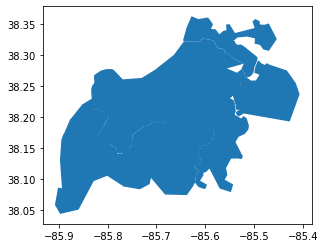

In [24]:
sewershed_shapes.plot()

In [25]:
sewershed_shapes

OBJECTID  ...                                           geometry
0          1  ...  MULTIPOLYGON (((-85.78311 38.20093, -85.77877 ...
1          2  ...  MULTIPOLYGON (((-85.67938 38.28525, -85.67977 ...
2          3  ...  MULTIPOLYGON (((-85.54017 38.22214, -85.53995 ...
3          4  ...  MULTIPOLYGON (((-85.58981 38.22644, -85.59465 ...
4          5  ...  MULTIPOLYGON (((-85.70614 38.21619, -85.70635 ...
5          6  ...  MULTIPOLYGON (((-85.42653 38.19364, -85.42734 ...
6          7  ...  MULTIPOLYGON (((-85.59137 38.11740, -85.59734 ...
7          8  ...  MULTIPOLYGON (((-85.62816 38.36298, -85.61415 ...
8          9  ...  MULTIPOLYGON (((-85.56399 38.29103, -85.55677 ...
9         10  ...  MULTIPOLYGON (((-85.80322 38.27691, -85.80130 ...
10        11  ...  MULTIPOLYGON (((-85.82712 38.25536, -85.82802 ...
11        12  ...  MULTIPOLYGON (((-85.68374 38.11696, -85.68279 ...
12        13  ...  MULTIPOLYGON (((-85.79902 38.16326, -85.79784 ...
13        14  ...  MULTIPOLYGON (((-85.82017 38.16614, -85.81892 ...
14        15  ...  MULTIPOLYGON (((-85.58569 38.19823, -85.58516 ...
15        16  ...  MULTIPOLYGON (((-85.56187 38.22743, -85.55983 ...
16        17  ...  MULTIPOLYGON (((-85.73708 38.23648, -85.73362 ...
17        18  ...  MULTIPOLYGON (((-85.78412 38.18632, -85.78492 ...

[18 rows x 16 columns]

In [26]:
# create dict for matching up the catchment area numbers and names
ww_df_nums = pd.read_excel('/content/viral_concentration_and_case_data_2022-01-24_JZ (1).xlsx', sheet_name='adjusted SARS-CoV-2 N1')
ww_df_nums.columns = ww_df_nums.iloc[0]
ww_df_dict = ww_df_nums.iloc[1].to_dict()
ww_df_dict_rev = {v:k for k,v in ww_df_dict.items()}
ww_df_dict_rev

{1: 'MFWQTC',
 10: 'Ashby Lane & Mill Creek',
 11: 'Locust & Lobdell',
 12: 'Newburg Rd',
 13: 'W. Indian Trail',
 14: 'Pineland & Oakmont',
 15: 'Preston & South Park',
 16: 'KY & Swan',
 17: '15th & Wilson',
 2: 'DRGWQTC',
 3: 'CCWQTC',
 4: 'FFWQTP',
 5: 'HCWQTP',
 6: 'Shawnee Park',
 7: '34th Street',
 8: 'Muddy Forks',
 9: 'Wood Road & Terry Road',
 'catchment area number': 'catchment area name'}

In [27]:
sewershed_shapes[['Address','ZoneNUM']]

Address  ZoneNUM
0                       15th and Wilson       17
1   Indian Hills Trail & River Bluff Rd        8
2                               Guthrie        2
3                        Morriss Forman        1
4                          Newburg Road       12
5                           Floyds Fork        4
6                           Cedar Creek        3
7                            Hite Creek        5
8             Locust St & Lobdell Alley       11
9                        34th Street PS        7
10                         Shawnee Park        6
11              Preston & South Park Rd       15
12                             Ashby Ln       10
13                   Wood Rd & Terry Rd        9
14                       Pineland Drive       14
15                    West Indian Trail       13
16                                            16
17             W. Ashland & Taylor Blvd       18

In [28]:
ww_df_dict_rev[18]=''

In [29]:
sewershed_shapes['Address_2'] = sewershed_shapes['ZoneNUM'].apply(lambda x: ww_df_dict_rev[x])

In [30]:
sewershed_shapes[['ZoneNUM','Address','Address_2','geometry']]

ZoneNUM  ...                                           geometry
0        17  ...  MULTIPOLYGON (((-85.78311 38.20093, -85.77877 ...
1         8  ...  MULTIPOLYGON (((-85.67938 38.28525, -85.67977 ...
2         2  ...  MULTIPOLYGON (((-85.54017 38.22214, -85.53995 ...
3         1  ...  MULTIPOLYGON (((-85.58981 38.22644, -85.59465 ...
4        12  ...  MULTIPOLYGON (((-85.70614 38.21619, -85.70635 ...
5         4  ...  MULTIPOLYGON (((-85.42653 38.19364, -85.42734 ...
6         3  ...  MULTIPOLYGON (((-85.59137 38.11740, -85.59734 ...
7         5  ...  MULTIPOLYGON (((-85.62816 38.36298, -85.61415 ...
8        11  ...  MULTIPOLYGON (((-85.56399 38.29103, -85.55677 ...
9         7  ...  MULTIPOLYGON (((-85.80322 38.27691, -85.80130 ...
10        6  ...  MULTIPOLYGON (((-85.82712 38.25536, -85.82802 ...
11       15  ...  MULTIPOLYGON (((-85.68374 38.11696, -85.68279 ...
12       10  ...  MULTIPOLYGON (((-85.79902 38.16326, -85.79784 ...
13        9  ...  MULTIPOLYGON (((-85.82017 38.16614, -85.81892 ...
14       14  ...  MULTIPOLYGON (((-85.58569 38.19823, -85.58516 ...
15       13  ...  MULTIPOLYGON (((-85.56187 38.22743, -85.55983 ...
16       16  ...  MULTIPOLYGON (((-85.73708 38.23648, -85.73362 ...
17       18  ...  MULTIPOLYGON (((-85.78412 38.18632, -85.78492 ...

[18 rows x 4 columns]

In [31]:
sewershed_shapes.Address = sewershed_shapes.Address.replace(' ',np.nan).combine_first(sewershed_shapes.Address_2)
sewershed_shapes.Address_2 = sewershed_shapes.Address_2.replace('',np.nan).combine_first(sewershed_shapes.Address)
sewershed_shapes[['ZoneNUM','Address','Address_2','geometry']]

ZoneNUM  ...                                           geometry
0        17  ...  MULTIPOLYGON (((-85.78311 38.20093, -85.77877 ...
1         8  ...  MULTIPOLYGON (((-85.67938 38.28525, -85.67977 ...
2         2  ...  MULTIPOLYGON (((-85.54017 38.22214, -85.53995 ...
3         1  ...  MULTIPOLYGON (((-85.58981 38.22644, -85.59465 ...
4        12  ...  MULTIPOLYGON (((-85.70614 38.21619, -85.70635 ...
5         4  ...  MULTIPOLYGON (((-85.42653 38.19364, -85.42734 ...
6         3  ...  MULTIPOLYGON (((-85.59137 38.11740, -85.59734 ...
7         5  ...  MULTIPOLYGON (((-85.62816 38.36298, -85.61415 ...
8        11  ...  MULTIPOLYGON (((-85.56399 38.29103, -85.55677 ...
9         7  ...  MULTIPOLYGON (((-85.80322 38.27691, -85.80130 ...
10        6  ...  MULTIPOLYGON (((-85.82712 38.25536, -85.82802 ...
11       15  ...  MULTIPOLYGON (((-85.68374 38.11696, -85.68279 ...
12       10  ...  MULTIPOLYGON (((-85.79902 38.16326, -85.79784 ...
13        9  ...  MULTIPOLYGON (((-85.82017 38.16614, -85.81892 ...
14       14  ...  MULTIPOLYGON (((-85.58569 38.19823, -85.58516 ...
15       13  ...  MULTIPOLYGON (((-85.56187 38.22743, -85.55983 ...
16       16  ...  MULTIPOLYGON (((-85.73708 38.23648, -85.73362 ...
17       18  ...  MULTIPOLYGON (((-85.78412 38.18632, -85.78492 ...

[18 rows x 4 columns]

In [32]:
ww_df_melt = pd.merge(ww_df_melt, sewershed_shapes[['Address','Address_2']], left_on=['sewershed'], right_on=['Address_2'])

In [33]:
ww_df_melt

date      sewershed   value           Address      Address_2
0    2020-08-11         MFWQTC  0.0034    Morriss Forman         MFWQTC
1    2020-08-12         MFWQTC  0.0046    Morriss Forman         MFWQTC
2    2020-08-13         MFWQTC  0.0021    Morriss Forman         MFWQTC
3    2020-08-14         MFWQTC     NaN    Morriss Forman         MFWQTC
4    2020-08-15         MFWQTC     NaN    Morriss Forman         MFWQTC
...         ...            ...     ...               ...            ...
8920 2022-01-13  15th & Wilson     NaN   15th and Wilson  15th & Wilson
8921 2022-01-14  15th & Wilson     NaN   15th and Wilson  15th & Wilson
8922 2022-01-15  15th & Wilson     NaN   15th and Wilson  15th & Wilson
8923 2022-01-16  15th & Wilson     NaN   15th and Wilson  15th & Wilson
8924 2022-01-17  15th & Wilson  0.7161   15th and Wilson  15th & Wilson

[8925 rows x 5 columns]

# Make Viz

In [34]:
viz_start_date = '2021-07-01'
min_visible_conc = 0.01

ww_source_df = ww_df_melt[ww_df_melt['date']>=viz_start_date]
ww_source_df[ww_source_df['value']<=min_visible_conc] = np.nan # remove points from view so they're not shown at bottom after clamping 
zip_source_df = zip_gdf[zip_gdf['date_ending']>=viz_start_date][['ZIPCODE','date_ending','aveDaily_R']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [35]:
county_viz = alt.Chart(county_df).mark_area().encode(
    x=alt.X('reported:T', scale=alt.Scale(domain=[ww_source_df.date.min(), ww_source_df.date.max()], clamp=True)),
    y='confirmed_per100k_7davg'
)

county_viz

alt.Chart(...)

In [61]:
zip_select = alt.selection(type='multi', fields=['ZIPCODE'], #bind=zip_dropdown, 
                                    name='Zip Code')

zip_viz = alt.Chart(zip_source_df).mark_line(opacity=0.9).encode(
    color=alt.Color('ZIPCODE', scale=alt.Scale(scheme='goldorange', reverse=False), legend=None),
    x=alt.X('date_ending:T', scale=alt.Scale(domain=[ww_source_df.date.min(), ww_source_df.date.max()], clamp=True), 
            axis=alt.Axis(title=None)),
    y=alt.Y('aveDaily_R', axis=alt.Axis(title='New Cases per 100k')),
    tooltip=['ZIPCODE','date_ending','aveDaily_R']
).properties(width=400, height=200).add_selection(zip_select).transform_filter(zip_select)

zip_viz

alt.Chart(...)

In [72]:
zip_base_map = alt.Chart(data=zip_shapes).mark_geoshape(stroke='black').encode(
    color=alt.condition(zip_select, alt.value('yellow'), alt.value('lightgrey')),
    opacity=alt.condition(zip_select, alt.value(0.3), alt.value(0.1)),
    strokeOpacity=alt.value(1),
    strokeWidth=alt.condition(zip_select, alt.value(2), alt.value(0.5)),
    tooltip=["ZIPCODE"],
    ).project(
      type='mercator', #reflectY=True
).properties(width=500, height=400).add_selection(zip_select)#.transform_filter(zip_select)

zip_base_map

alt.Chart(...)

In [73]:
sewershed_select = alt.selection_multi(fields=['Address_2'], bind='legend', clear=False)

sewershed_viz = alt.Chart(ww_source_df).mark_point(filled=True, clip=True).encode(
    x=alt.X('date:T', scale=alt.Scale(domain=[ww_source_df.date.min(), ww_source_df.date.max()], clamp=False), 
            axis=alt.Axis(title=None)),
    y=alt.Y('value:Q', axis=alt.Axis(title='PMMoV-adjusted SARS-CoV-2 N1 (copies/mL)'), scale=alt.Scale(type='log', domain=[min_visible_conc, 1e5], clamp=True)),
    color=alt.Color('Address_2', scale=alt.Scale(scheme='category20')),
    opacity = alt.condition(sewershed_select, alt.value(1), alt.value(0.)),
    tooltip=['date','Address_2','value']
).properties(width=400, height=200).add_selection(sewershed_select)#.transform_filter(select_shed)

sewershed_viz

alt.Chart(...)

In [74]:
sewershed_base_map = alt.Chart(data=sewershed_shapes).mark_geoshape(stroke='black', strokeWidth=0.5).encode(
    color=alt.value('grey'),
    ).project(type='mercator').properties(width=500, height=500)

sewershed_map = sewershed_base_map.encode(
    color=alt.Color("Address_2:N", legend=alt.Legend(title='Catchment Area', orient='left'), scale=alt.Scale(scheme='category20')),
    opacity = alt.condition(sewershed_select, alt.value(1), alt.value(0.2)),
).add_selection(sewershed_select).properties(
    title={"text": ["Wastewater Catchment Areas with ZIP Code Boundaries Overlaid in Yellow"],
           "subtitle": "Click on map to select ZIP code, click on legend to select catchment area (shift-click to select multiple areas)",
          "fontSize": 14,
          "fontWeight": "bold",
    },
    # title='Wastewater Catchment Areas with Zip Code Boundaries Overlaid in Yellow'

)

sewershed_map

alt.Chart(...)

In [75]:
combo_viz = alt.hconcat(sewershed_map+zip_base_map, sewershed_viz & (county_viz+zip_viz).resolve_scale(color='independent')).properties(
    title={
      "text": ["Louisville, KY SARS-CoV-2 Wastewater Surveillance by Catchment Area and New Case Trends by ZIP code and in Jefferson County"], 
      "subtitle": ["Sources: wastewater surveillance source TK, Louisville (LOJIC) Open Geospatial Data",
                  ""],
      "subtitleFontSize": 14
    },

).configure_legend(offset=10)

In [76]:
combo_viz

alt.HConcatChart(...)

In [78]:
combo_viz.save('louisville-wws.html')